In [12]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import datetime
import os
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [13]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
assert X_train.shape==(60000,28,28)
assert X_test.shape==(10000,28,28)
assert y_train.shape==(60000,)
assert y_test.shape==(10000,)

In [14]:
X_train = X_train / 255.0
X_test = X_test / 255.0

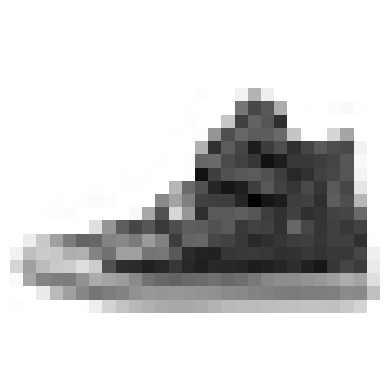

In [15]:
plt.imshow(X_train[142], cmap='binary')
plt.axis('off')
plt.show()

In [16]:
class_names=["koszulka","spodnie","pulower","sukienka","kurtka","sandał","koszula","but", "torba","kozak"]
class_names[y_train[142]]

'but'

In [17]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_21 (Dense)            (None, 300)               235500    
                                                                 
 dense_22 (Dense)            (None, 100)               30100     
                                                                 
 dense_23 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [19]:
tf.keras.utils.plot_model(model,"fashion_mnist.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [20]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [21]:
print(os.getcwd())

/home/makowskitomasz/MachineLearning/10lab


In [22]:
def new_folder(folder_name):
    current_time = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    log_dir = os.path.join(folder_name, current_time)
    print(log_dir)
    return log_dir

In [23]:
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=new_folder('image_logs'), histogram_freq=1)

image_logs/20230709-120359


In [14]:
epochs = 20
history = model.fit(X_train, y_train, epochs=epochs,validation_split=0.1, callbacks=[tensorboard_callback])

Epoch 1/20
1688/1688 [==============================] - 12s 7ms/step - loss: 0.7177 - accuracy: 0.7654 - val_loss: 0.6427 - val_accuracy: 0.7607
Epoch 2/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4867 - accuracy: 0.8310 - val_loss: 0.4927 - val_accuracy: 0.8277
Epoch 3/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.4404 - accuracy: 0.8462 - val_loss: 0.4249 - val_accuracy: 0.8457
Epoch 4/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.4137 - accuracy: 0.8554 - val_loss: 0.4222 - val_accuracy: 0.8527
Epoch 5/20
1688/1688 [==============================] - 10s 6ms/step - loss: 0.3934 - accuracy: 0.8626 - val_loss: 0.4014 - val_accuracy: 0.8582
Epoch 6/20
1688/1688 [==============================] - 11s 6ms/step - loss: 0.3772 - accuracy: 0.8675 - val_loss: 0.3836 - val_accuracy: 0.8623
Epoch 7/20
1688/1688 [==============================] - 19s 11ms/step - loss: 0.3640 - accuracy: 0.8721 - val_loss: 0.3811 - val_a

1/1 [==============================] - 0s 201ms/step
Prediction: kozak
Confidence: 0.18407178
Truth: spodnie


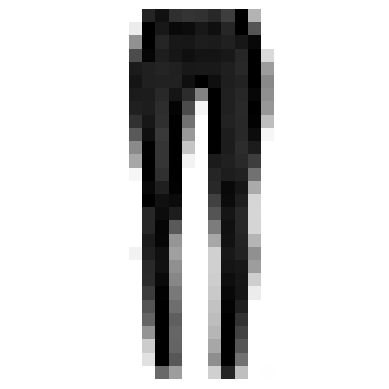

1/1 [==============================] - 0s 44ms/step
Prediction: kozak
Confidence: 0.19596271
Truth: pulower


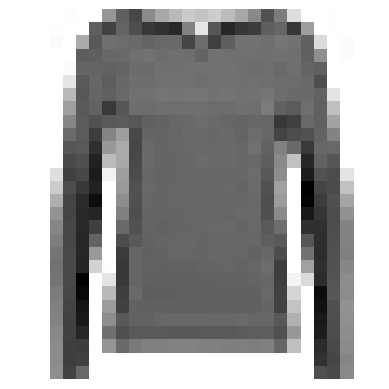

1/1 [==============================] - 0s 35ms/step
Prediction: kozak
Confidence: 0.2247456
Truth: koszula


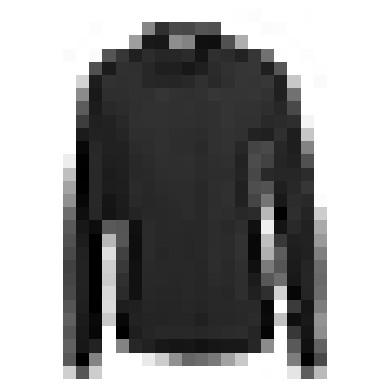

1/1 [==============================] - 0s 25ms/step
Prediction: kozak
Confidence: 0.25589627
Truth: torba


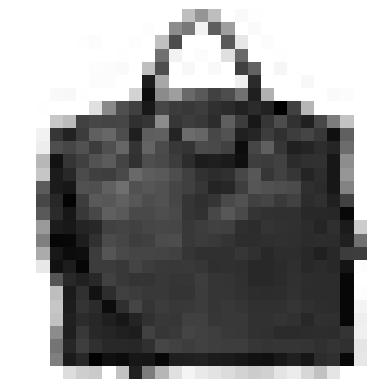

1/1 [==============================] - 0s 32ms/step
Prediction: kozak
Confidence: 0.1734707
Truth: spodnie


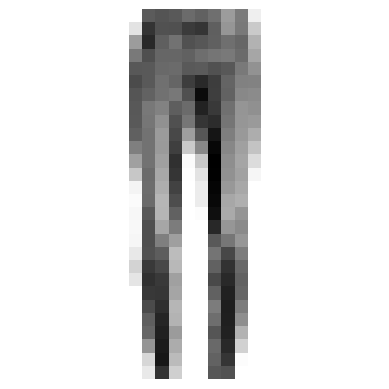

In [24]:
for _ in range(5):
    image_index=np.random.randint(len(X_test))
    image=np.array([X_test[image_index]])
    confidences=model.predict(image)
    confidence=np.max(confidences[0])
    prediction=np.argmax(confidences[0])
    print("Prediction:", class_names[prediction])
    print("Confidence:", confidence)
    print("Truth:", class_names[y_test[image_index]])
    plt.imshow(image[0], cmap="binary")
    plt.axis('off')
    plt.show()

In [25]:
model.save('fashion_clf.h5')

In [26]:
housing = fetch_california_housing()
X = housing["data"]
y = housing["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
validation_split = 0.1
validation_samples = int(len(X_train) * validation_split)
X_val = X_train[:validation_samples]
y_val = y_train[:validation_samples]
X_train = X_train[validation_samples:]
y_train = y_train[validation_samples:]
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(14861, 8) (14861,)
(1651, 8) (1651,)
(4128, 8) (4128,)


In [27]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)
X_test = scaler.fit_transform(X_test)

In [28]:
regression_model = keras.models.Sequential()
regression_model.add(keras.layers.Dense(30, activation='relu', input_shape=(X_train.shape[1],)))
regression_model.add(keras.layers.Dense(1))
regression_model.compile(loss='mean_squared_error', optimizer='sgd')

In [29]:
regression_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 30)                270       
                                                                 
 dense_25 (Dense)            (None, 1)                 31        
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [30]:
early_stopping = keras.callbacks.EarlyStopping(patience=5, min_delta=0.01, verbose=1)

In [31]:
tensorboard_callback_regression = keras.callbacks.TensorBoard(log_dir=new_folder('housing_logs/regression_model'), histogram_freq=1)

housing_logs/regression_model/20230709-120507


In [32]:
epochs = 100
regression_model.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, tensorboard_callback_regression]
)

Epoch 1/100
465/465 [==============================] - 3s 5ms/step - loss: 0.7392 - val_loss: 0.5144
Epoch 2/100
 42/465 [=>............................] - ETA: 2s - loss: 0.4950

KeyboardInterrupt: 

In [23]:
regression_model.save('reg_housing_1.h5')

In [37]:
regression_model2 = keras.models.Sequential()
regression_model2.add(keras.layers.Dense(64, activation='relu'))
regression_model2.add(keras.layers.Dense(64, activation='relu'))
regression_model2.add(keras.layers.Dense(1))
regression_model2.compile(optimizer='sgd', loss='mean_squared_error')

In [43]:
regression_model2.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 64)                576       
                                                                 
 dense_36 (Dense)            (None, 64)                4160      
                                                                 
 dense_37 (Dense)            (None, 1)                 65        
                                                                 
Total params: 4,801
Trainable params: 4,801
Non-trainable params: 0
_________________________________________________________________


In [40]:
tensorboard_callback_regression = keras.callbacks.TensorBoard(log_dir=new_folder('housing_logs/regression_model2'), histogram_freq=1)

housing_logs/regression_model2/20230709-120604


In [41]:
epochs = 1000
history2 = regression_model2.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, tensorboard_callback_regression]
)

Epoch 1/1000
465/465 [==============================] - 3s 5ms/step - loss: 0.8297 - val_loss: 2.1323
Epoch 2/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.5122 - val_loss: 0.4625
Epoch 3/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.5667 - val_loss: 0.5843
Epoch 4/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.5857 - val_loss: 0.4284
Epoch 5/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.4157 - val_loss: 0.4115
Epoch 6/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.3976 - val_loss: 0.3963
Epoch 7/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.3831 - val_loss: 0.4039
Epoch 8/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.3736 - val_loss: 0.3802
Epoch 9/1000
465/465 [==============================] - 1s 2ms/step - loss: 0.3638 - val_loss: 0.3800
Epoch 10/1000
465/465 [==============================] - 1s 3ms/step - loss: 0.355

In [42]:
regression_model2.save('reg_housing_2.h5')

In [8]:
regression_model3 = keras.models.Sequential()
regression_model3.add(keras.layers.Dense(256, activation='relu'))
regression_model3.add(keras.layers.Dense(128, activation='relu'))
regression_model3.add(keras.layers.Dense(64, activation='relu'))
regression_model3.add(keras.layers.Dense(32, activation='relu'))
regression_model3.add(keras.layers.Dense(16, activation='relu'))
regression_model3.add(keras.layers.Dense(1))
regression_model3.compile(optimizer='sgd', loss='mean_squared_error')

In [9]:
regression_model3.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [29]:
tensorboard_callback_regression = keras.callbacks.TensorBoard(log_dir=new_folder('housing_logs/regression_model3'), histogram_freq=1)

housing_logs/regression_model3/20230524-143302


In [30]:
epochs = 1000
history3 = regression_model3.fit(
    X_train, y_train,
    epochs=epochs,
    validation_data=(X_val, y_val),
    callbacks=[early_stopping, tensorboard_callback_regression]
)

Epoch 1/1000
465/465 [==============================] - 3s 6ms/step - loss: 0.7028 - val_loss: 0.5611
Epoch 2/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.4005 - val_loss: 1.1615
Epoch 3/1000
465/465 [==============================] - 2s 5ms/step - loss: 0.3684 - val_loss: 1.8374
Epoch 4/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.3535 - val_loss: 2.2789
Epoch 5/1000
465/465 [==============================] - 2s 4ms/step - loss: 0.3366 - val_loss: 3.2502
Epoch 6/1000
465/465 [==============================] - 2s 5ms/step - loss: 0.3294 - val_loss: 4.2455
Epoch 6: early stopping


In [31]:
regression_model3.save('reg_housing_3.h5')